# ??????????????

In [1]:
#import libraries
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer
import pandas as pd
import itertools

Katzova središčnost

In [90]:
def katz(G, max_num_of_steps, tolerance, alpha, beta, vector=None):
    '''Computes the Katz centrality for the nodes of the graph G.'''
    start = timer()
    A = nx.adjacency_matrix(G)
    #A = Qmatrix(A)
    diff = 1000
    k = 0
    ones = np.ones((A.shape[1], 1))
    if vector is None:
        vector = ones
    r = beta * vector
    while diff > tolerance and k < max_num_of_steps:
        # inner product of matrix A and vector r
        r, q = alpha*A.dot(r) + beta * ones, r
        diff = np.linalg.norm(q-r, ord=1)
        k += 1
    print('process finished after {} iterations'.format(k))
    end = timer()
    # timing of the process
    print('time consumption: {} seconds'.format(end-start))
    return r/np.linalg.norm(r,ord = 2)

Googlov PageRank

In [3]:
def Qmatrix(matrix):
    '''for given adjecency matrix of a network returns column stohastic matrix Q,
    some columns may still be zero'''
    sums = np.sum(matrix, axis=0)       #array of sums of columns in matrix
    return np.nan_to_num(matrix/sums)   #divide every column with it's sum, if sum is 0,  
                                        #returns zero column instead of nan

def dvector(matrix):
    '''for given adjecency matrix returns transposed vector d, where d[j] = 1 ; if #(outlinks of j) = 0 
    and d[j] = 0 ; otherwise'''
    Q = Qmatrix(matrix)             #compute matrix Q
    sums = np.sum(matrix, axis=0)   #array of sums of columns in matrix 
    d_bool = (sums == 0)            #booleninan array, True if the sum of a column is equal to 0, false otherwise
    d = d_bool*1                    #convert False to 0 and True to 1
    return d

def evector(n):
    '''returns vector v of ones in size of n''' # n = num of columns in matrix
    return np.ones((n,1))    

def Pmatrix(matrix):
    '''returns column stohastic matrix P without zero columns'''
    n = matrix.shape[1]
    Q = Qmatrix(matrix)
    e = evector(n)
    d = dvector(matrix)
    return Q + 1/n*e.dot(d)

def Amatrix(matrix, alpha):
    '''returns ireducible column stohastic matrix A of given matrix, 
    where 0 <= alpha <= 1'''
    n = matrix.shape[1]
    e = evector(n)
    P = Pmatrix(matrix)
    return alpha*P + (1-alpha)*1/n*e.dot(e.transpose())

def pagerank2(matrix, max_num_of_steps, tolerance, alpha):
    '''returns pagerank vector of adjacency matrix, 0<=alpha<=1'''
    start = timer()
    A = Amatrix(matrix, alpha)           #column stohastic matrix from given matrix
    r = A[:,0]  #first guess for vector r is first column of Q
    diff = 1000
    k = 0
    while diff > tolerance and k < max_num_of_steps:
        r, q = A.dot(r), r              #inner product of matrix Q and vector r
        #r = q/np.linalg.norm(q, ord=1)  #not necessary
        diff = np.linalg.norm(q-r, ord=1)
        k+=1
    print('process finished after {} iterations'.format(k))
    end = timer()
    print('time consumption: {} seconds'.format(end-start))  #timing of the process
    return r

Funkcija za primerjavo

In [4]:
def rank(array):
    '''Returns vector with ranked values of array,
    where 0 is the minimum value of array'''
    temp = array.argsort(axis=0)
    ranks = temp.argsort(axis=0)
    return ranks

GRAF KARATE

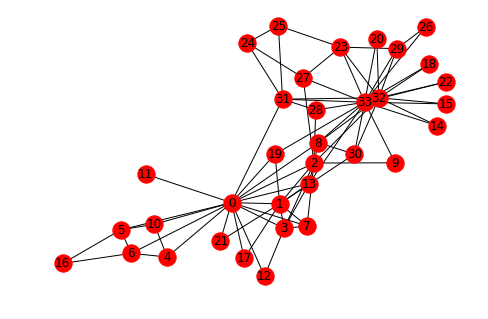

In [28]:
# pagerank on bigger network
O = nx.karate_club_graph() 
nx.draw(O, with_labels=True)
plt.show()
R = nx.adjacency_matrix(O)
#print(R.todense())

In [13]:
np.amax(np.linalg.eigvals(R.todense()))

(6.725697727631749+0j)

MAJHEN GRAF T

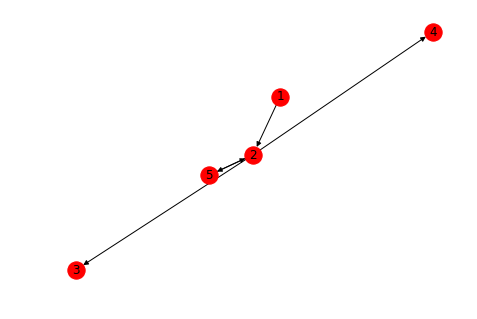

[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


In [14]:
T = nx.DiGraph()   # or DiGraph, etc
T.add_edges_from( ((1,2), (2,3), (2,4), (2,5), (5,2)) )
nx.draw(T, with_labels=True)
plt.show()
M = nx.adjacency_matrix(T)
print(R.todense())

In [15]:
katz_moj = katz(T, 10000,0.01,0.2, 1)
rank(katz_moj)

process finished after 5 iterations
time consumption: 0.0023148080000083837 seconds


array([[2],
       [4],
       [0],
       [1],
       [3]], dtype=int64)

In [16]:
katz_moj

array([[0.00032],
       [0.00096],
       [0.     ],
       [0.     ],
       [0.00032]])

In [17]:
page_moj = pagerank2(R,10000,0.000001,0.85)
page_moj

process finished after 41 iterations
time consumption: 0.015066449000002535 seconds


matrix([[0.09699752],
        [0.05287699],
        [0.0570785 ],
        [0.03585991],
        [0.02197805],
        [0.02911129],
        [0.02911129],
        [0.02449053],
        [0.02976603],
        [0.01430938],
        [0.02197805],
        [0.00956476],
        [0.01464492],
        [0.02953648],
        [0.01453596],
        [0.01453596],
        [0.01678409],
        [0.0145587 ],
        [0.01453596],
        [0.01960465],
        [0.01453596],
        [0.0145587 ],
        [0.01453596],
        [0.03152243],
        [0.02107599],
        [0.02100615],
        [0.015044  ],
        [0.02563971],
        [0.01957343],
        [0.02628846],
        [0.02459013],
        [0.03715802],
        [0.07169305],
        [0.10091896]])

In [18]:
rank(katz_moj) == rank(page_moj)

c:\users\tina\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [19]:
katz_njihov = nx.katz_centrality(T, alpha = 0.002, tol = 0.01)
page_njihov = nx.pagerank(T, alpha = 0.001, tol = 0.01)
(katz_njihov, page_njihov)

({1: 0.4463205979603883,
  2: 0.44810588035222987,
  3: 0.44721323915630906,
  4: 0.44721323915630906,
  5: 0.44721323915630906},
 {1: 0.19988,
  2: 0.20028,
  3: 0.19994666666666666,
  4: 0.19994666666666666,
  5: 0.19994666666666666})

In [91]:
karate_katz_moj = katz(O, 10000,0.001, 1/28, 1)
print(karate_katz_moj)
karate_katz_njihov = nx.katz_centrality(O, alpha = 1/28, beta = 1, tol = 0.001)
print(karate_katz_njihov)

process finished after 8 iterations
time consumption: 0.0016657060000397905 seconds
[[0.23564803]
 [0.19642387]
 [0.20445982]
 [0.17963637]
 [0.15905265]
 [0.1644394 ]
 [0.1644394 ]
 [0.16823205]
 [0.1770341 ]
 [0.15496611]
 [0.15905265]
 [0.1474994 ]
 [0.15391493]
 [0.17681261]
 [0.15529365]
 [0.15529365]
 [0.15082913]
 [0.15451447]
 [0.15529365]
 [0.16309503]
 [0.15529365]
 [0.15451447]
 [0.15529365]
 [0.1728301 ]
 [0.15711106]
 [0.15732072]
 [0.15362662]
 [0.16674967]
 [0.16141978]
 [0.16695275]
 [0.1686313 ]
 [0.18070418]
 [0.21363075]
 [0.24025856]]
{0: 0.23562512628831248, 1: 0.19640958557068555, 2: 0.2044376362240266, 3: 0.17962833251834395, 4: 0.15906442828103573, 5: 0.16445137374009722, 6: 0.16445137374009722, 7: 0.16822881161124426, 8: 0.17702201508015653, 9: 0.1549724457267842, 10: 0.15906442828103573, 11: 0.1475133252229714, 12: 0.1539244888224798, 13: 0.17680070384652294, 14: 0.1553000439010803, 15: 0.1553000439010803, 16: 0.15084892464458854, 17: 0.15452259736408344, 18: 

In [79]:
import math
G = nx.path_graph(4)
print(nx.info(G))
phi = (1 + math.sqrt(5)) / 2.0
alpha = 1/phi - 0.01
G_katz_moj = katz(G, 10000,0.001, alpha, 1)
print(G_katz_moj)
G_katz_njihov = nx.katz_centrality(G, alpha = alpha, beta = 1, tol = 0.001)
print(G_katz_njihov)

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 3
Average degree:   1.5000
process finished after 506 iterations
time consumption: 0.012181613999928231 seconds
[[44.91081151]
 [72.21799691]
 [72.21799691]
 [44.91081151]]
{0: 0.3734182804129661, 1: 0.60046547598794, 2: 0.60046547598794, 3: 0.3734182804129661}


In [86]:
[(karate_katz_moj[i,0] / karate_katz_njihov[i])**(1/8) for i in range(len(karate_katz_njihov))]

[1.2796636270986161,
 1.279659710954585,
 1.27966543395924,
 1.2796552369726046,
 1.2796362323684063,
 1.279636428459294,
 1.279636428459294,
 1.2796511543474405,
 1.279658998452071,
 1.2796415405438974,
 1.2796362323684063,
 1.2796329827258346,
 1.279638145966907,
 1.279658849236784,
 1.2796414907541316,
 1.2796414907541316,
 1.2796270838433452,
 1.2796396653107789,
 1.2796414907541316,
 1.2796486112057275,
 1.2796414907541316,
 1.2796396653107789,
 1.2796414907541316,
 1.27964727045765,
 1.2796325800994761,
 1.2796329313909227,
 1.2796367221096,
 1.2796452853506348,
 1.2796454512490736,
 1.2796455693063211,
 1.2796519134072142,
 1.2796528876395747,
 1.279661940611492,
 1.2796643968206076]

In [87]:
sum(x**2 for x in karate_katz_njihov.values())

1.0000000000000002

In [63]:
?nx.katz_centrality

In [64]:
nx.adjacency_spectrum(O)

array([ 6.72569773e+00+0.00000000e+00j,  4.97707423e+00+0.00000000e+00j,
       -4.48722919e+00+0.00000000e+00j, -3.44793486e+00+0.00000000e+00j,
       -3.11069092e+00+0.00000000e+00j,  2.91650670e+00+0.00000000e+00j,
       -2.43742443e+00+0.00000000e+00j,  2.30908767e+00+0.00000000e+00j,
       -2.09082295e+00+0.00000000e+00j, -1.68768945e+00+0.00000000e+00j,
       -1.44407374e+00+0.00000000e+00j, -1.19242425e+00+0.00000000e+00j,
       -1.04208785e+00+0.00000000e+00j, -7.92406815e-01+0.00000000e+00j,
       -4.18818748e-01+0.00000000e+00j,  1.48615954e+00+0.00000000e+00j,
        1.45305566e+00+0.00000000e+00j,  1.08328639e+00+0.00000000e+00j,
        1.03145042e+00+0.00000000e+00j,  8.34304102e-01+0.00000000e+00j,
        2.99410685e-01+0.00000000e+00j,  4.19729474e-01+0.00000000e+00j,
        6.15840589e-01+0.00000000e+00j, -2.00000000e+00+0.00000000e+00j,
        2.24121811e-16+0.00000000e+00j,  3.52059077e-16+0.00000000e+00j,
       -2.18021493e-16+0.00000000e+00j,  4.23395654

In [24]:
karate_page_moj = pagerank2(R, 10000,0.001,0.001)
print(karate_page_moj)
karate_page_njihov = nx.pagerank(O, alpha = 0.001, tol = 0.001)
print(karate_page_njihov)

process finished after 2 iterations
time consumption: 0.0036909510000100454 seconds
[[0.02953506]
 [0.02945181]
 [0.02944578]
 [0.02941834]
 [0.02940135]
 [0.02941605]
 [0.02941605]
 [0.02939532]
 [0.02939869]
 [0.02938704]
 [0.02940135]
 [0.0293842 ]
 [0.0293891 ]
 [0.02939706]
 [0.02938655]
 [0.02938655]
 [0.02939706]
 [0.02938747]
 [0.02938655]
 [0.02938921]
 [0.02938655]
 [0.02938747]
 [0.02938655]
 [0.02941105]
 [0.02940441]
 [0.02940294]
 [0.02939144]
 [0.02940272]
 [0.02939194]
 [0.02940713]
 [0.0293957 ]
 [0.02941779]
 [0.02949187]
 [0.02955186]]
{0: 0.029535130718954247, 1: 0.02945183823529412, 2: 0.02944579248366013, 3: 0.029418341503267973, 4: 0.029401348039215687, 5: 0.029416053921568628, 6: 0.029416053921568628, 7: 0.0293953022875817, 8: 0.029398666378316035, 9: 0.029387024221453287, 10: 0.029401348039215687, 11: 0.02938419117647059, 12: 0.029389093137254903, 13: 0.02939703239138793, 14: 0.029386534025374857, 15: 0.029386534025374857, 16: 0.02939705882352941, 17: 0.0293874